In [1]:
#Import the relevant dependencies for web scraping, Pandas, and matplotlib

#import splinter and beautiful soup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

# import pandas and matplotlib
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

import csv
import numpy as np

In [2]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
#visit the Mars temperature data website (weather) by using spliter and Beautiful soup
#url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
#browser.visit(url)

# Optional delay for loading the page
#browser.is_element_present_by_css('div.list_text', wait_time=1)


In [4]:
#Scrape the data in the HTML table. 

#use Panda's read html method 

mars_temp_html_df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
mars_temp_html_df


[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [5]:
#Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. 

#The id heading: The identification number of a single transmission from the Curiosity rover.
#The terrestrial_date heading: The date on Earth.
#The sol heading: The number of elapsed sols (Martian days) since Curiosity landed on Mars.
#The ls heading: The solar longitude.
#The month heading: The Martian month.
#The min_temp heading: The minimum temperature, in Celsius, of a single Martian day (sol).
#The pressure heading: The atmospheric pressure at Curiosity's location.

mars_temp_df = mars_temp_html_df[0]
mars_temp_df 
 

    


id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]

In [6]:
#Examine the data types of all the DataFrame columns
mars_temp_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [7]:
#cast (or convert) the data to the appropriate datetime, int, or float data types
mars_temp_df['terrestrial_date']=pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [8]:
#Answer the following question: How many months exist on Mars?

print(mars_temp_df['month'].nunique())

12


In [9]:
#Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?

print(mars_temp_df['sol'].nunique())

1867


In [10]:
#Answer the following question: What are the coldest and the warmest months on Mars (at the location of Curiosity)?
#Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

#average min daily temp  of all months

min_temps = mars_temp_df.groupby(by=['month'])["min_temp"].mean()
min_temps



month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<AxesSubplot:xlabel='month'>

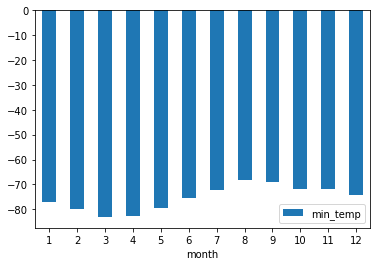

In [14]:
#Plot the results as a bar chart

temps_df = pd.DataFrame(min_temps)
temp_chart =temps_df.plot.bar(rot=0)
temp_chart

In [15]:
temps_df

min_temp
month           
1     -77.160920
2     -79.932584
3     -83.307292
4     -82.747423
5     -79.308725
6     -75.299320
7     -72.281690
8     -68.382979
9     -69.171642
10    -71.982143
11    -71.985507
12    -74.451807

In [16]:
#coldest month
#index+1 for month (1-12)

np.argmin(min_temps)+1




3

In [17]:
#warmest month
#index+1 for month (1-12)

np.argmax(min_temps)+1


8

<AxesSubplot:xlabel='month'>

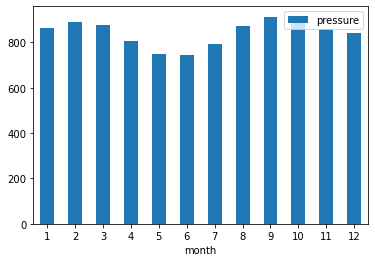

In [18]:
#Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? 
#Get the answer by averaging the daily atmospheric pressure of all the months. 
#Plot the results as a bar chart.

pressure = mars_temp_df.groupby(by=['month'])["pressure"].mean()
pressure_df = pd.DataFrame(pressure)
pressure_chart = pressure_df.plot.bar(rot=0)
pressure_chart

In [19]:
#Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
#Visually estimate the result by plotting the daily minimum temperature.

min_temps_day = mars_temp_df.groupby(by=['sol'])["min_temp"].mean()
min_temps_day

sol
10     -75.0
11     -76.0
12     -76.0
13     -74.0
14     -74.0
        ... 
1973   -78.0
1974   -77.0
1975   -76.0
1976   -77.0
1977   -77.0
Name: min_temp, Length: 1867, dtype: float64

<AxesSubplot:xlabel='sol'>

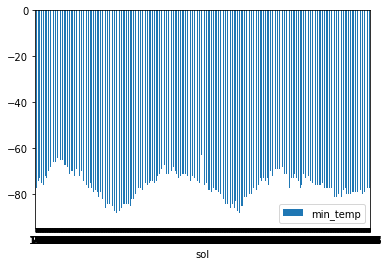

In [20]:
#Plot the results as a bar chart

temps_df = pd.DataFrame(min_temps_day)
temp_chart =temps_df.plot.bar(rot=0)
temp_chart

In [21]:
#Plot the results as a line chart (larger plot)

temps_df.plot(figsize=(500,200),ylim=(-90,-60))
plt.show()



From above graph observing avg peak to average peak is ~700 days (day 1168-468) therefore 
Mars circles the Sun once, ~700 days elapse on Earth

The actual value is 687 earth day




In [23]:
#Export the DataFrame to a CSV file.

mars_temp_df.to_csv("MarsWeatherData.csv", index = False)

id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]